# Dataset Information
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [61]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn import metrics
get_ipython().run_line_magic('matplotlib', 'inline')


# Loading the dataset

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data preprocessing

In [4]:
 def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())


In [5]:
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 284807

Number of features: 31

Features:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Missing values: 0

Unique values:
Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [6]:
#statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#datatype info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# (EDA)

# Distribution of feature and target

C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


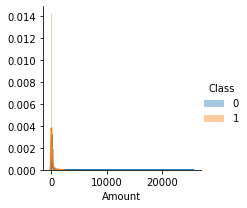

In [8]:
sns.FacetGrid(df,hue="Class",size=3).map(sns.distplot,"Amount").add_legend()
plt.show()

C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


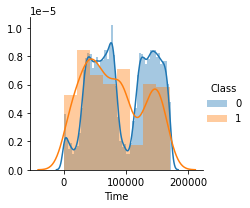

In [9]:
sns.FacetGrid(df,hue="Class",size=3).map(sns.distplot,"Time").add_legend()
plt.show()

C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

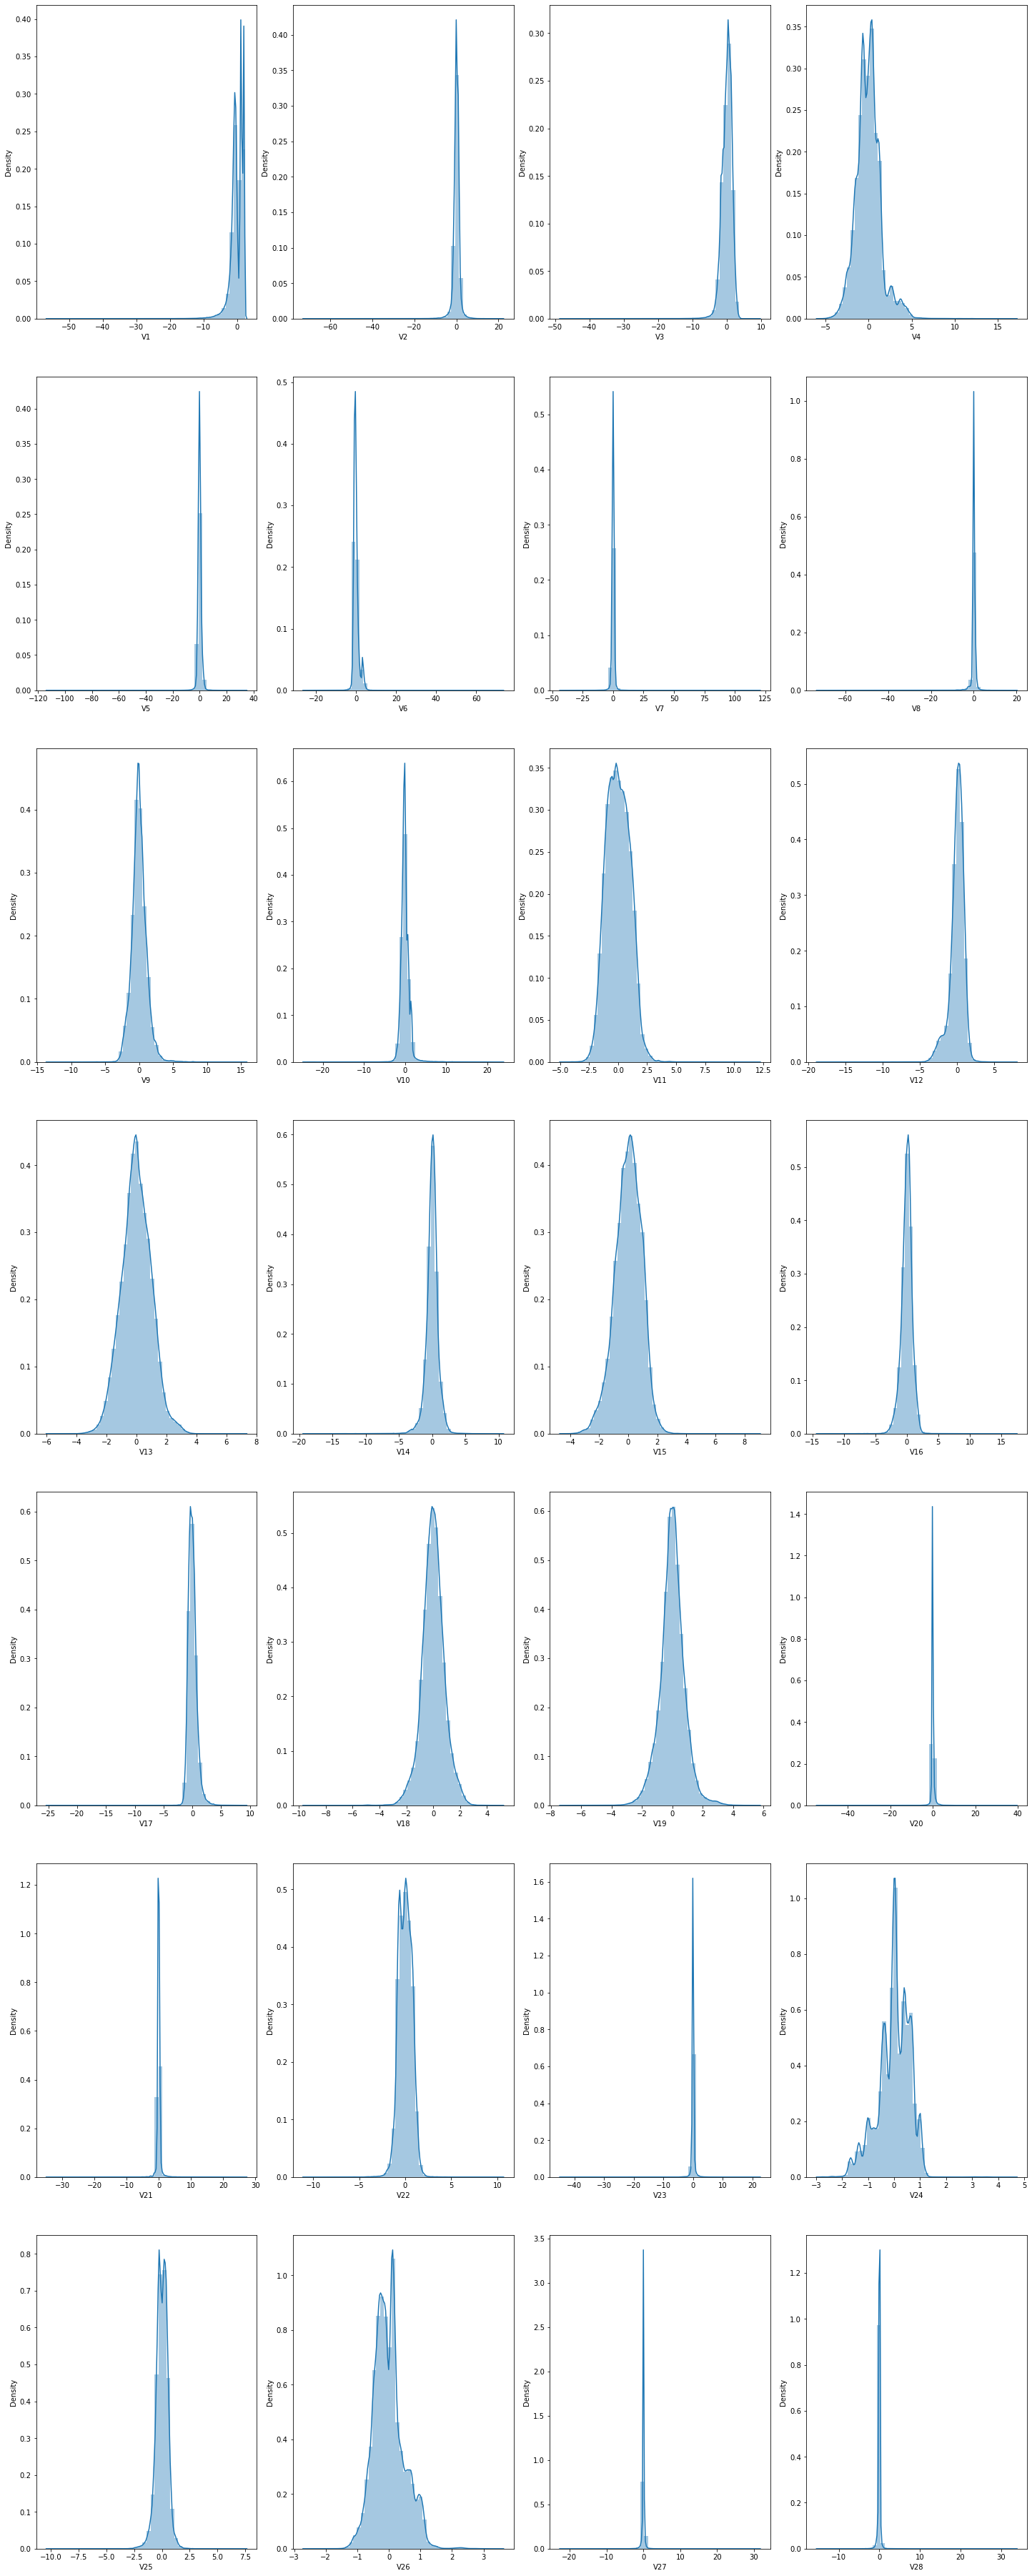

In [10]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0 
ax = ax.flatten()

for col , value in df_temp.items():
    sns.distplot(value  , ax =ax[index])
    index +=1
plt.tight_layout(pad= 0.5,w_pad=0.7,h_pad=5.0)

# Min-Max Normalization

In [11]:
cols = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)
for col in cols :
    #find the min&maz of cols
    minimum = min(df_temp[col])
    maximum = max(df_temp[col])
    df[col] = (df[col]-minimum) /(maximum - minimum)

C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

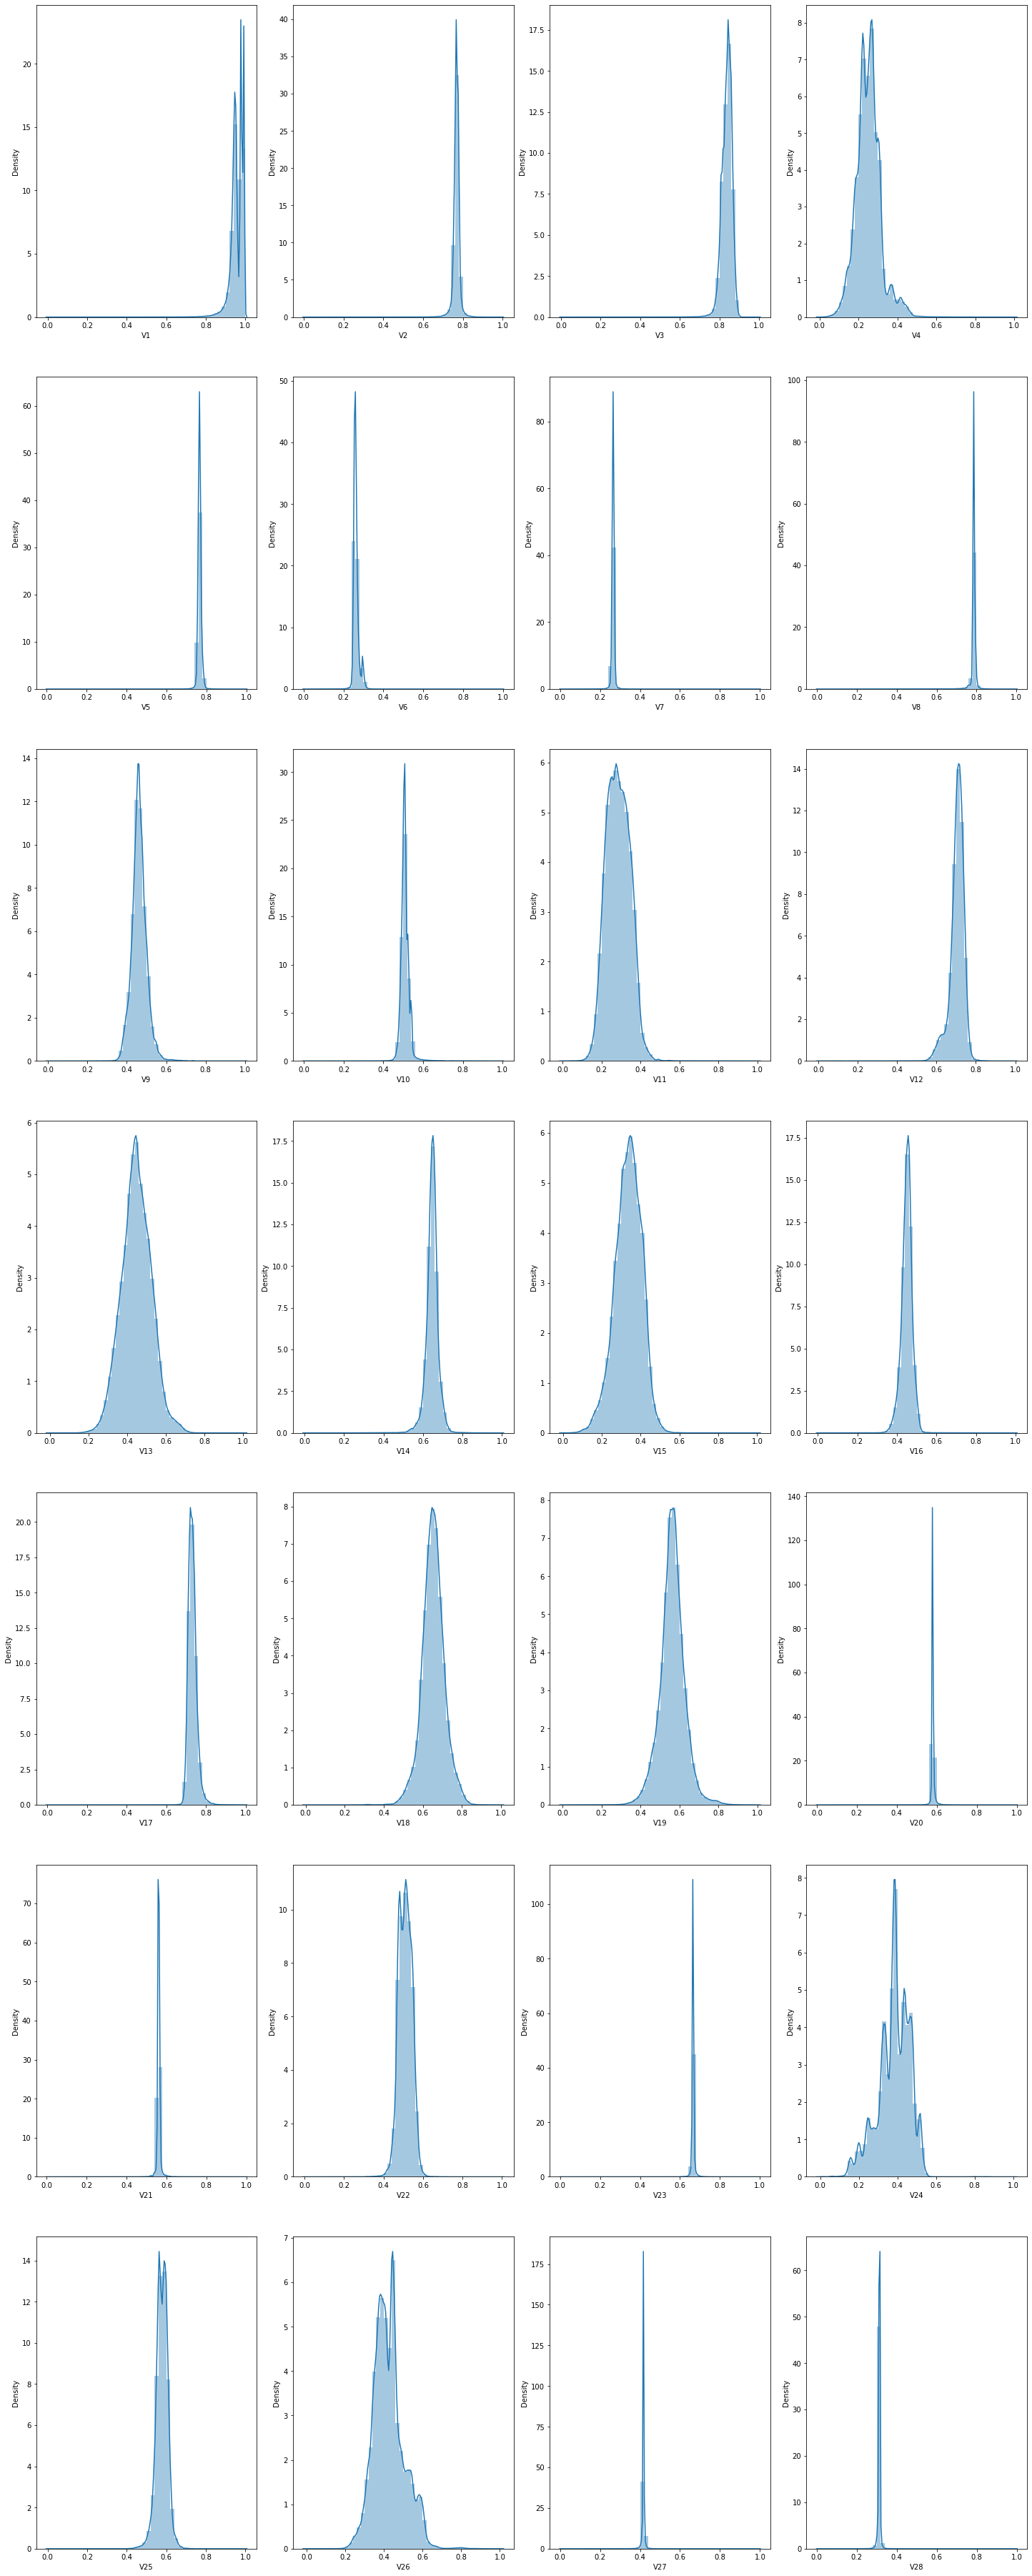

In [12]:
#CREATE DIST PLOTS 
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0 
ax = ax.flatten()

for col , value in df_temp.items():
    sns.distplot(value  , ax =ax[index])
    index +=1
plt.tight_layout(pad= 0.5,w_pad=0.7,h_pad=5.0)

# checking for the outliers


<AxesSubplot:xlabel='Amount'>

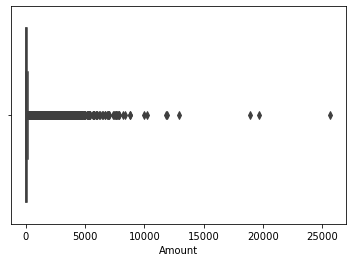

In [13]:
#CREATE BOX PLOTS (to identify outliers)
sns.boxplot (x=df['Amount'])

In [14]:
df.shape

(284807, 31)

In [15]:
first_quartile = df['Amount'].quantile(.25)
third_quartile = df['Amount'].quantile(.75)
IQR = third_quartile - first_quartile
new_boundary = third_quartile + 1.5*IQR

In [16]:
df.drop(df[df['Amount']>new_boundary].index , axis= 0 , inplace = True )

In [17]:
df.shape

(252903, 31)

<AxesSubplot:xlabel='Amount'>

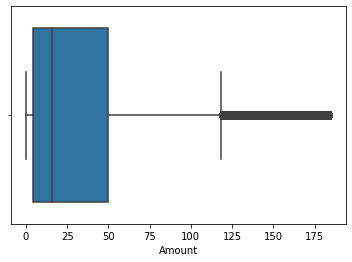

In [18]:
sns.boxplot (x=df['Amount'])

# Distribution of legit transaction and fraudulent transaction

In [19]:
df['Class'].value_counts()

0    252502
1       401
Name: Class, dtype: int64

C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

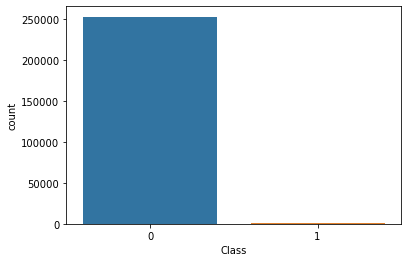

In [20]:
sns.countplot(df['Class'])

# The Dataset is highly unbalanced
  0 --> Normal trans
  
  1 --> fraudulent tans
  


In [21]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [22]:
print (legit.shape)
print (fraud.shape)


(252502, 31)
(401, 31)


In [23]:
#statistical measure of the data
legit.Amount.describe()

count    252502.000000
mean         34.982798
std          42.167106
min           0.000000
25%           4.490000
50%          16.000000
75%          49.990000
max         184.500000
Name: Amount, dtype: float64

In [24]:
fraud.Amount.describe()

count    401.000000
mean      29.993416
std       45.076499
min        0.000000
25%        1.000000
50%        2.270000
75%       45.480000
max      180.000000
Name: Amount, dtype: float64

In [25]:
#compare the values for both transcations
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95012.156830,0.960038,0.769623,0.838673,0.250750,0.766536,0.262448,0.264905,0.785644,0.46323,...,0.579640,0.561162,0.510157,0.665533,0.382527,0.578029,0.425123,0.416549,0.313088,34.982798
1,78825.985037,0.872349,0.811670,0.707412,0.463284,0.744422,0.247117,0.226942,0.790933,0.36916,...,0.584427,0.573009,0.509513,0.665290,0.366546,0.582534,0.435681,0.418709,0.315430,29.993416


 # under-sampling to make similar distribuation  fraud and legit trans
 
 No of fraudulent trasn = 401 

In [26]:
legit_sample = legit.sample(n= 401)

concatinating two data frames


In [27]:
new_df= pd.concat([legit_sample,fraud], axis = 0)

C:\Users\MAHMOUD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


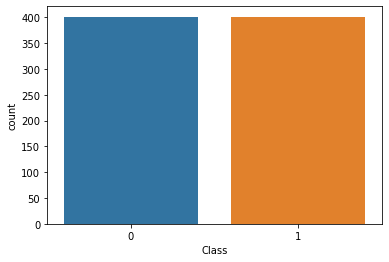

In [28]:
sns.countplot(new_df["Class"]);

In [29]:
new_df['Class'].value_counts()

1    401
0    401
Name: Class, dtype: int64

In [30]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96758.990025,0.959696,0.770901,0.836716,0.250991,0.766611,0.262380,0.265154,0.786242,0.459363,...,0.579609,0.560842,0.508787,0.665511,0.379060,0.578703,0.425762,0.416563,0.313212,33.841297
1,78825.985037,0.872349,0.811670,0.707412,0.463284,0.744422,0.247117,0.226942,0.790933,0.369160,...,0.584427,0.573009,0.509513,0.665290,0.366546,0.582534,0.435681,0.418709,0.315430,29.993416


# Coorrelation Matrix

In [31]:
numeric_features = new_df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [32]:
correlation = numeric_features.corr()
print(correlation['Class'].sort_values(ascending = False),'\n')

Class     1.000000
V4        0.727699
V11       0.719069
V2        0.525628
V19       0.227725
V20       0.226333
V28       0.134950
V21       0.123395
V26       0.064996
V27       0.054165
V25       0.051300
V8        0.041063
V22       0.006223
V23      -0.007607
Amount   -0.045018
V13      -0.064740
V24      -0.083758
V15      -0.098230
Time     -0.182437
V5       -0.370682
V6       -0.431973
V1       -0.436112
V18      -0.465445
V7       -0.510180
V9       -0.559459
V17      -0.560054
V3       -0.568922
V16      -0.601142
V10      -0.629189
V12      -0.703846
V14      -0.768600
Name: Class, dtype: float64 



Text(0.5, 1, 'correlation of numeric features ')

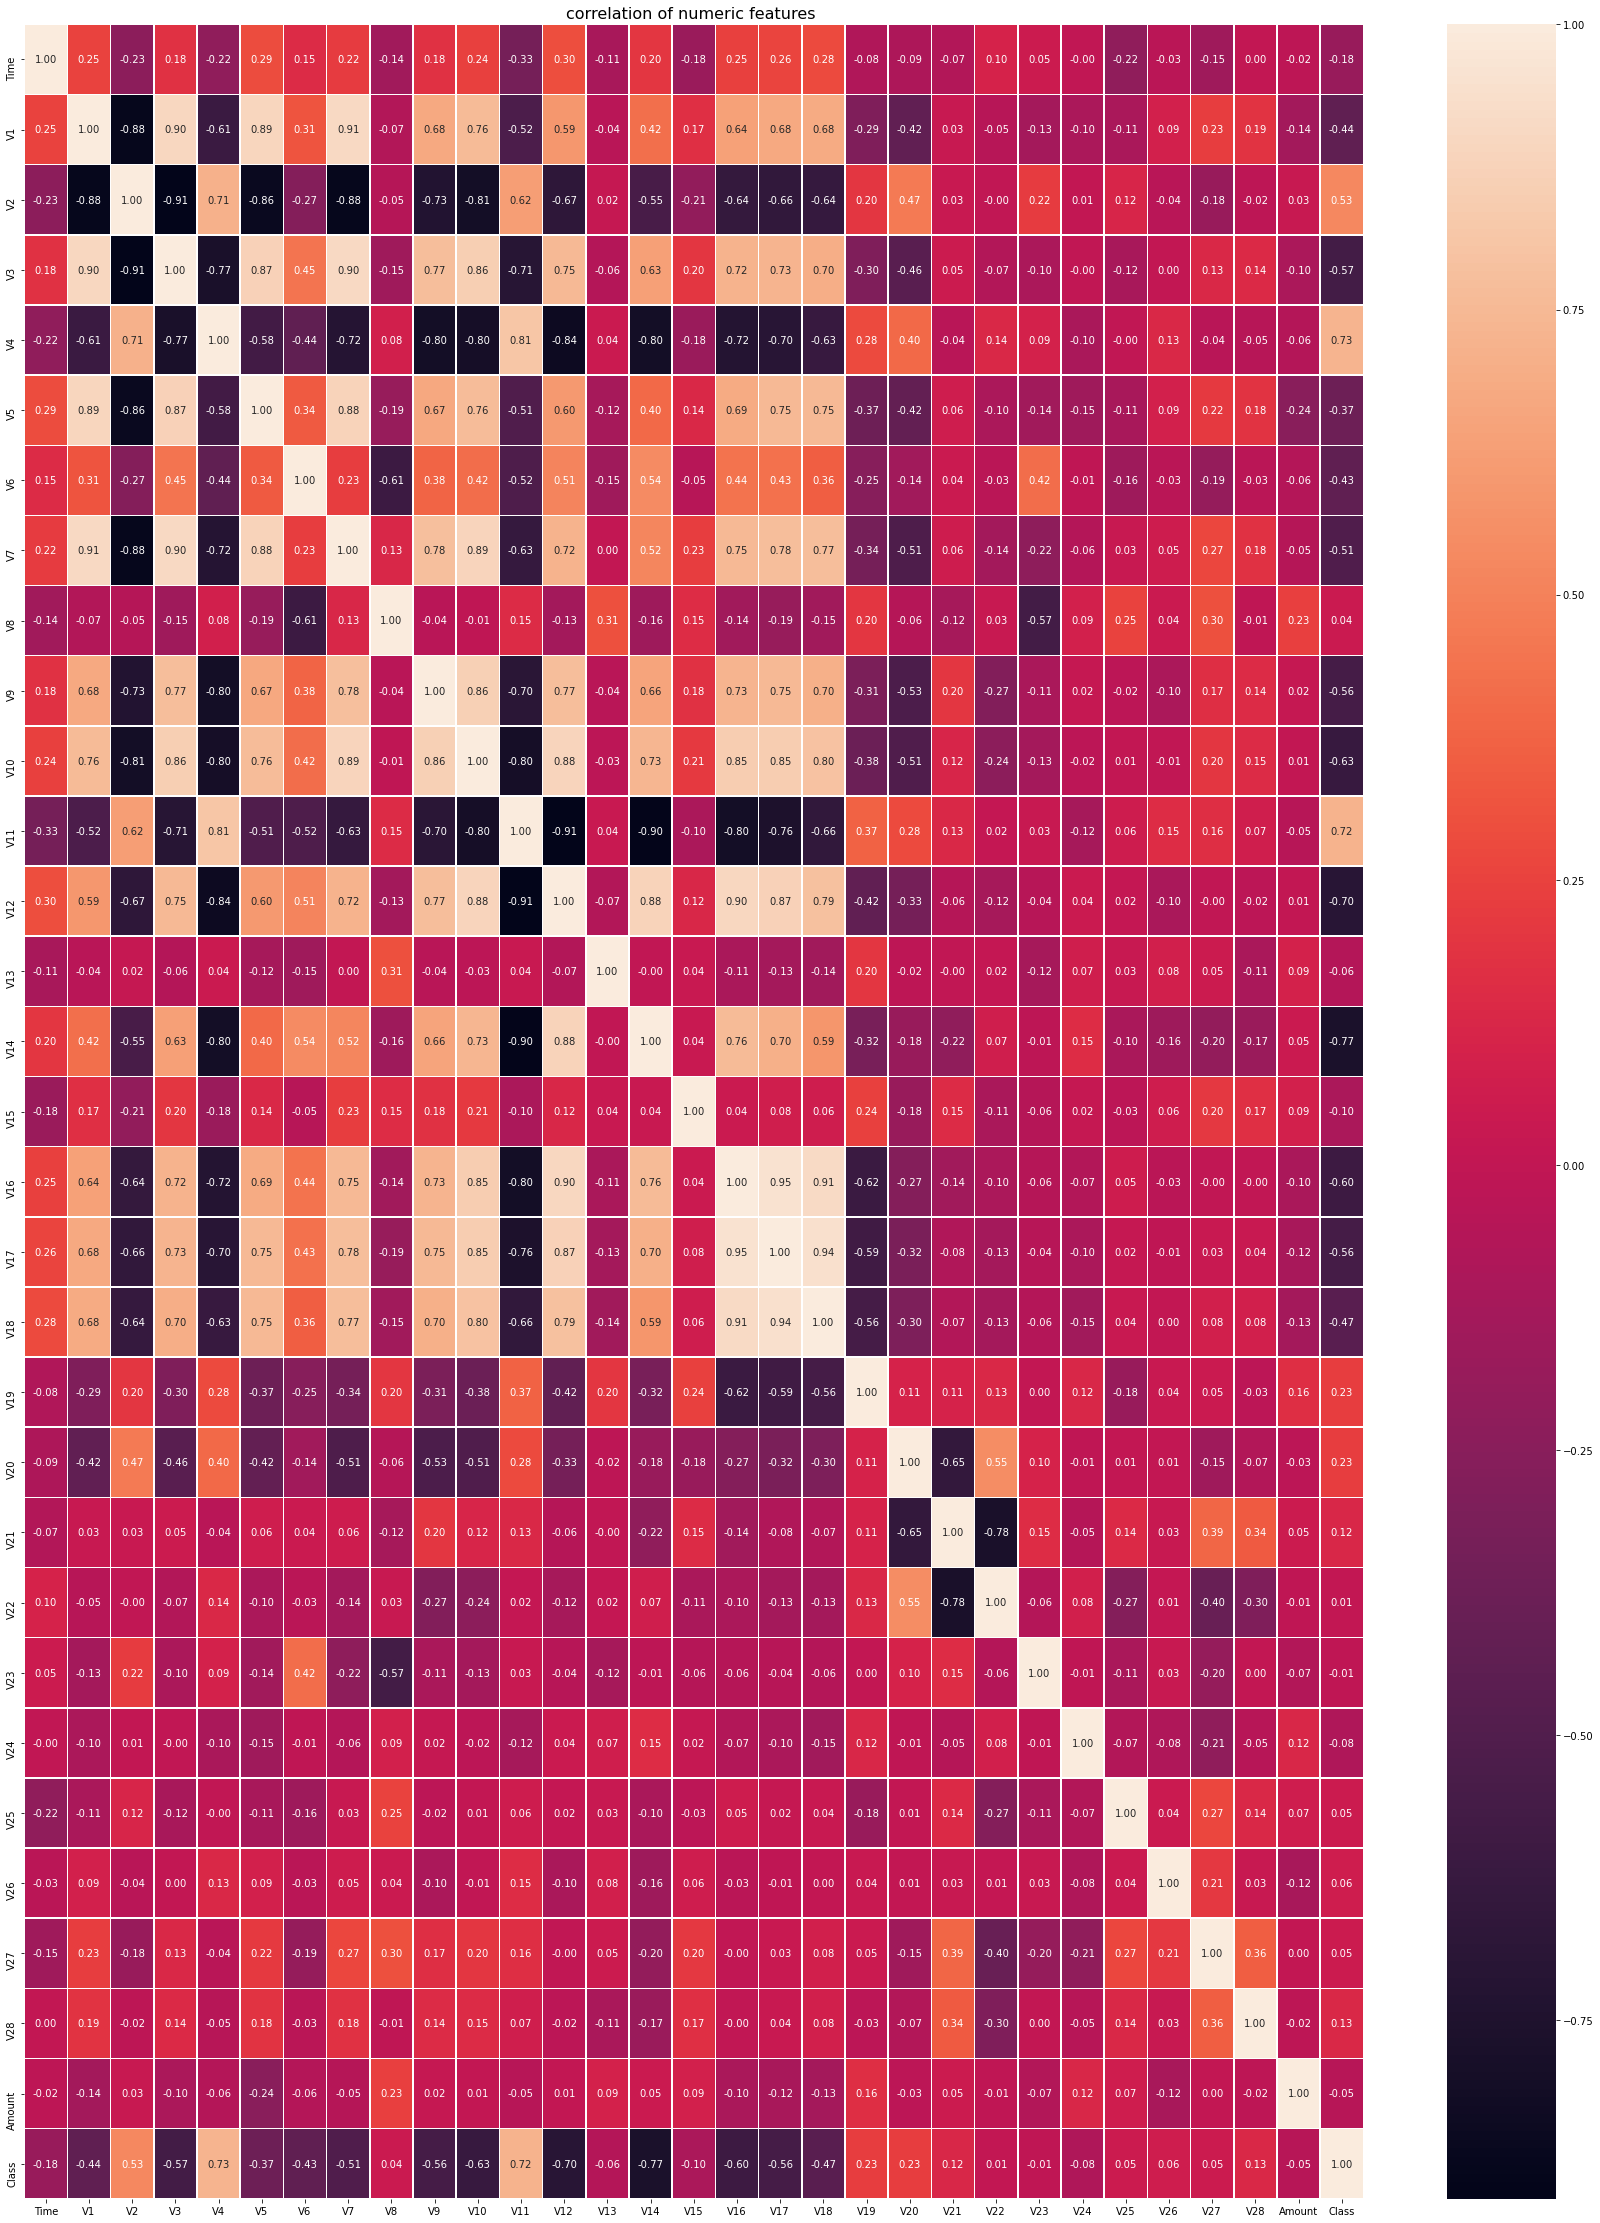

In [46]:
f, ax = plt.subplots(figsize=(30, 40))
sns.heatmap(correlation,annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.title("correlation of numeric features ",y =1 , size = 16)

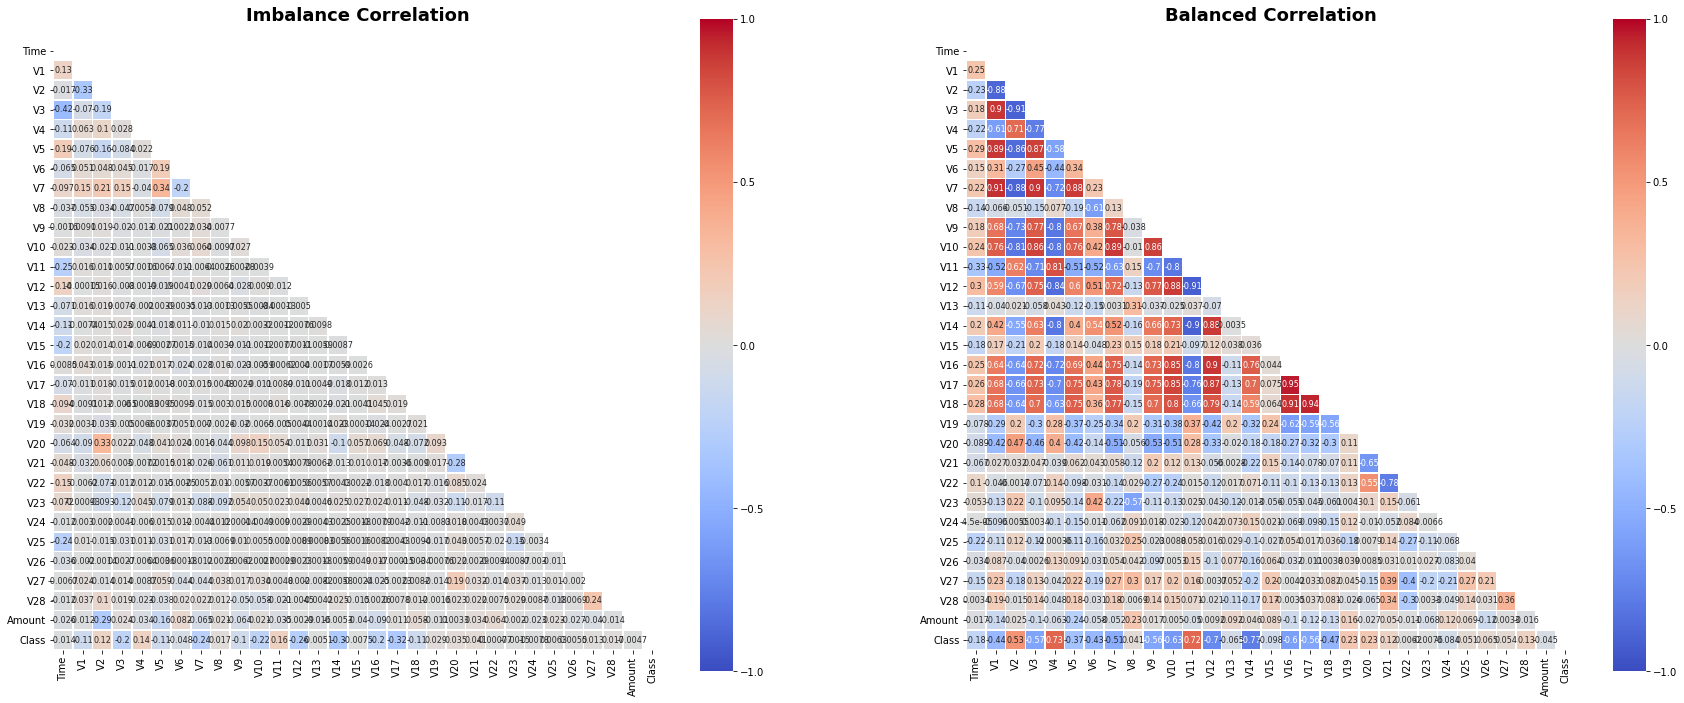

In [47]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True


f, axes = plt.subplots(ncols=2, figsize=(30,30))

heatmap = sns.heatmap(df.corr(),
            mask = mask,
            square = True,
            linewidths = .5,
            cmap = 'coolwarm',
            cbar_kws = {'shrink': .4,"ticks" : [-1, -.5, 0, 0.5, 1]},
            vmin = -1,
            vmax = 1,
            annot = True,
            annot_kws = {"size": 8},
            ax = axes[0])

axes[0].set_title('Imbalance Correlation', size = 18, weight='bold', pad=20);

heatmap = sns.heatmap(new_df.corr(),
            mask = mask,
            square = True,
            linewidths = .5,
            cmap = 'coolwarm',
            cbar_kws = {'shrink': .4,"ticks" : [-1, -.5, 0, 0.5, 1]},
                        vmin = -1,
            vmax = 1,
            annot = True,
            annot_kws = {"size": 8},
            ax = axes[1])

axes[1].set_title('Balanced Correlation', size = 18, weight='bold', pad=20);

# Spliting data

In [48]:
x = new_df.drop(columns=['Class','V16','V12','Time'] , axis =1)
y =new_df.Class


In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Standard Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(x)

In [51]:
x_scaler[-1]

array([ 0.76003377, -0.57642721,  0.1811169 , -0.59706073,  0.59970173,
        0.41316376,  0.55185616, -0.06890131,  0.84876348,  0.44640977,
       -0.51070263,  0.41725788,  0.35590919, -0.7871639 ,  0.70469262,
        0.95741166,  0.2238873 , -0.18232589, -0.16421296, -0.22078967,
       -0.07163823, -0.68593439,  0.39821817, -0.68910318, -0.05403107,
       -0.18354183,  0.24832525])

# Building models

In [37]:
models = {
    "LogisiticRegression": LogisticRegression(solver='liblinear'),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
    "RandomForestClassifier": RandomForestClassifier()
}


In [68]:
from sklearn.model_selection import cross_val_score


def training_model():
    
    for key, model in models.items():
        #training
        model.fit(X_train,y_train)
        #perform cross-validation
        cv_score = cross_val_score(model,X_train,y_train,cv=5)
        print("Classifiers: ", key, "Has a training score of", round(cv_score.mean(), 2) * 100, "% accuracy score")
        
training_model()  

Classifiers:  LogisiticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNearest Has a training score of 80.0 % accuracy score
Classifiers:  Support Vector Classifier Has a training score of 67.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 92.0 % accuracy score


In [73]:
def ModelPredictionAccuracy():
    
    for key, model in models.items():
        #testing
        y_predict = model.predict(X_test)
        print("Classifiers: ", key, "Has a prediction score of", metrics.accuracy_score(y_test,y_predict) , "% accuracy score")
        
ModelPredictionAccuracy()

Classifiers:  LogisiticRegression Has a prediction score of 0.9503105590062112 % accuracy score
Classifiers:  KNearest Has a prediction score of 0.7701863354037267 % accuracy score
Classifiers:  Support Vector Classifier Has a prediction score of 0.6149068322981367 % accuracy score
Classifiers:  DecisionTreeClassifier Has a prediction score of 0.9192546583850931 % accuracy score
